<a href="https://colab.research.google.com/github/Kartik77/CIFAR-10/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform= transforms.ToTensor())

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle= True)

In [0]:
dataiter = iter(trainloader)
images,labels= dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
0


In [0]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [0]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [0]:
npimg = np.transpose(npimg, (1,2,0))
print(npimg.shape)

(32, 32, 3)


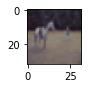

In [0]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

plane horse car frog


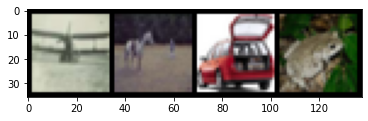

In [0]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn


class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3) 
    

  def forward(self, x):
      x= self.conv1(x)
      return x

In [0]:
net = FirstCNN()

In [0]:
out = net(images)
out.shape

torch.Size([4, 16, 30, 30])

In [0]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [0]:
out1 = out[0,0, :, :].detach().numpy()
print(out1.shape)

(30, 30)


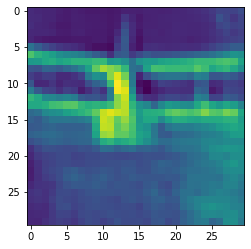

In [0]:
plt.imshow(out[0,0, :, :].detach().numpy())
plt.show()

#Deep CNN


In [0]:
class FirstCNN_v2(nn.Module):
  def __init__(self):
    super(FirstCNN_v2, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,8,3),
        nn.Conv2d(8,16,3)
    )

  def forward(self,x):
    x= self.model(x)
    return x

In [0]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

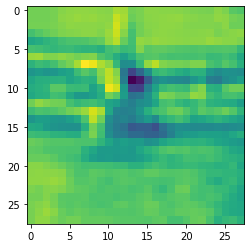

In [0]:
plt.imshow(out[0 ,0 ,:, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
  def __init__(self):
    super(FirstCNN_v3, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(6,16,5),
        nn.AvgPool2d(2, stride=2)
    )

  def forward(self,x):
    x= self.model(x)
    return x

In [0]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

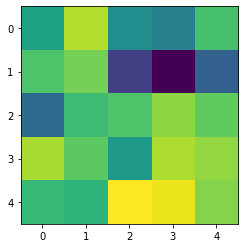

In [0]:
plt.imshow(out[0 ,0 ,:, :].detach().numpy())

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(6,16,5),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )
  
  def forward(self,x):
    print(x.shape)
    x = self.cnn_model(x)
    print(x.shape)
    x = x.view(x.size(0), -1)
    print(x.shape)
    x= self.fc_model(x)
    print(x.shape)
    return x

In [0]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [0]:
print(out)

tensor([[-0.0703, -0.0195,  0.1154,  0.0718,  0.0101,  0.0923, -0.0707,  0.0116,
         -0.0312,  0.0705],
        [-0.0709, -0.0192,  0.1185,  0.0709,  0.0073,  0.0917, -0.0724,  0.0114,
         -0.0283,  0.0692],
        [-0.0693, -0.0158,  0.1172,  0.0738,  0.0053,  0.0909, -0.0717,  0.0134,
         -0.0248,  0.0682],
        [-0.0716, -0.0198,  0.1196,  0.0715,  0.0052,  0.0919, -0.0733,  0.0123,
         -0.0307,  0.0684]], grad_fn=<AddmmBackward>)


In [0]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([2, 2, 2, 2])


# Training LeNet


In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5),
        nn.ReLU(),
        nn.AvgPool2d(2,stride=2),
        nn.Conv2d(6,16,5),
        nn.ReLU(),
        nn.AvgPool2d(2, stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),
        nn.ReLU(),
        nn.Linear(120,84),
        nn.ReLU(),
        nn.Linear(84,10)
    )
  
  def forward(self,x):
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    return x

In [0]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform= transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle= True)
testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform= transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle= True)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
  total, correct = 0,0
  for data in dataloader:
    inputs, labels = data
    outputs = net(inputs)
    _ , pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0 / 16, Test acc: 35.91, Train acc: 35.84
Epoch: 1 / 16, Test acc: 43.93, Train acc: 44.35
Epoch: 2 / 16, Test acc: 47.19, Train acc: 47.67
Epoch: 3 / 16, Test acc: 48.55, Train acc: 48.92
Epoch: 4 / 16, Test acc: 51.66, Train acc: 52.27
Epoch: 5 / 16, Test acc: 51.42, Train acc: 52.47
Epoch: 6 / 16, Test acc: 51.98, Train acc: 53.71
Epoch: 7 / 16, Test acc: 54.90, Train acc: 56.39
Epoch: 8 / 16, Test acc: 55.20, Train acc: 57.49
Epoch: 9 / 16, Test acc: 56.82, Train acc: 58.71
Epoch: 10 / 16, Test acc: 55.99, Train acc: 59.24
Epoch: 11 / 16, Test acc: 57.19, Train acc: 60.60
Epoch: 12 / 16, Test acc: 56.65, Train acc: 60.72
Epoch: 13 / 16, Test acc: 57.98, Train acc: 62.33
Epoch: 14 / 16, Test acc: 58.03, Train acc: 62.76
Epoch: 15 / 16, Test acc: 58.18, Train acc: 63.34


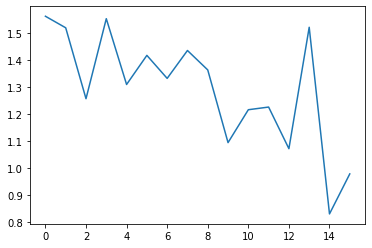

CPU times: user 7min 40s, sys: 5.93 s, total: 7min 46s
Wall time: 7min 48s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

  for i,data in enumerate(trainloader,0):

    inputs,labels = data
    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  loss_epoch_arr.append(loss.item())

  print('Epoch: %d / %d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()